In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2 as cv
from keras.preprocessing import image
import tensorflow


trainPath = '/kaggle/input/gtsrb-german-traffic-sign/Train'

data=[]
labels=[]
dataset_category_count = 0
for dirs in os.listdir(trainPath): #slozky z Train foldery
    #print(dirs)
    for files in os.listdir(trainPath+'/'+ dirs): #obrazek z foldery v kategorii
        try:
            sign_img = np.array(image.load_img(trainPath + "/"+ dirs +"/"+ files, target_size = (32,32)))
            data.append(sign_img) #do seznamu s obrazkovymi daty prida aktualne zpracovany/nacteny obrazek
            labels.append(int(dirs)) #do seznamu s labely prida cislo labelu ve kterem se obrazek nachazi
        except:
            pass
    dataset_category_count += 1
print(str(dataset_category_count))    

43


In [2]:
print(len(data),len(labels))
#popisky obrazku
category_labels = {
    0:"Speed limit (20km/h)",
    1:"Speed limit (30km/h)",
    2:"Speed limit (50km/h)",
    3:"Speed limit (60km/h)",
    4:"Speed limit (70km/h)",
    5:"Speed limit (80km/h)",
    6:"End of speed limit (80km/h)",
    7:"Speed limit (100km/h)",
    8:"Speed limit (120km/h)",
    9:"No passing",
    10:"No passing for vehicles over 3.5 metric tons",
    11:"Right-of-way at the next intersection",
    12:"Priority road",
    13:"Yield",
    14:"Stop",
    15:"No vehicles",
    16:"Vehicles over 3.5 metric tons prohibited",
    17:"No entry",
    18:"General caution",
    19:"Dangerous curve to the left",
    20:"Dangerous curve to the right",
    21:"Double curve",
    22:"Bumpy road",
    23:"Slippery road",
    24:"Road narrows on the right",
    25:"Road work",
    26:"Traffic signals",
    27:"Pedestrians",
    28:"Children crossing",
    29:"Bicycles crossing",
    30:"Beware of ice/snow",
    31:"Wild animals crossing",
    32:"End of all speed and passing limits",
    33:"Turn right ahead",
    34:"Turn left ahead",
    35:"Ahead only",
    36:"Go straight or right",
    37:"Go straight or left",
    38:"Keep right",
    39:"Keep left",
    40:"Roudabout mandatory",
    41:"End of no passing",
    42:"End of no passing by vehicles over 3.5 metric tons",
}
category_labels[0]


39209 39209


'Speed limit (20km/h)'

14619


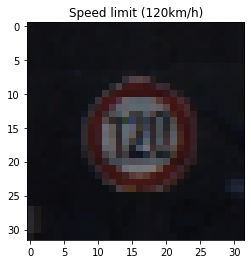

11583


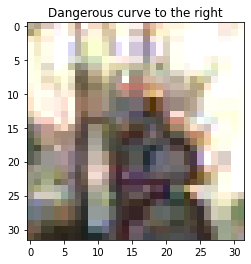

27604


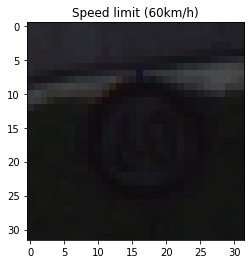

In [3]:
import matplotlib.pyplot as plt
import random

for i in range(3):
    rnd = random.randint(0,len(data))
    print(str(rnd))
    preview = plt.imshow(data[rnd])
    preview_title = plt.title(category_labels[labels[rnd]])
    plt.show()
 

X_train length: 31367
y_train length: 31367
X_test length: 7842
y_test length: 7842


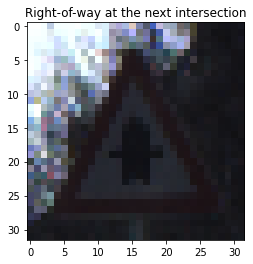

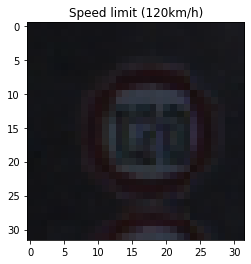

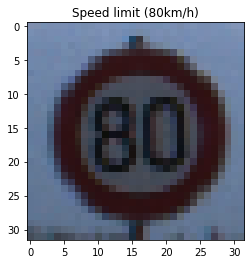

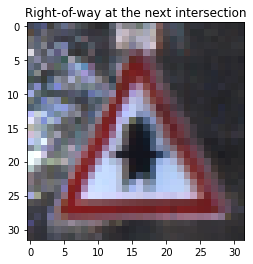

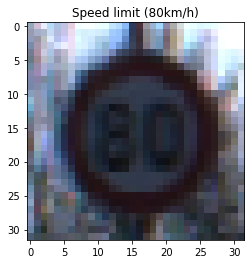

In [4]:
from sklearn.model_selection import train_test_split

#rozrazeni datasetu na trenovaci a testovaci data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=123)

print('X_train length:', len(X_train))
print('y_train length:', len(y_train))
print('X_test length:', len(X_test))
print('y_test length:', len(y_test))


for i in range(5):
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.title(category_labels[y_train[i]])
    plt.show()

In [18]:
X_train_array = np.array(X_train)
y_train_array = np.array(y_train)
#převede z RGB 0-255 na float 0-1
X_train_norm = X_train_array/255.0

X_test_array = np.array(X_test)
y_test_array = np.array(y_test)
X_test_norm = X_test_array/255.0
print(y_test_array[0])

21


In [35]:
from tensorflow.keras.applications.resnet import ResNet50
from keras.models import Model
from keras.layers import Dense, Dropout

In [21]:
resnet_model = ResNet50(weights= 'imagenet', include_top=False, input_shape= (32,32,3))

2022-12-07 10:17:08.702112: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


94781440/94765736 [==============================] - 3s 0us/step


In [38]:
resnet_output = resnet_model.output
resnet_output = Dropout(0.5)(resnet_output)
predictions = Dense(43, activation = 'softmax')(resnet_output)
model = Model(inputs = resnet_model.input, outputs = predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [39]:
fit_history = model.fit(X_train_norm,y_train_array,
                        validation_data=(X_test_norm,y_test_array),
                        batch_size=256,
                        epochs=20, verbose=1)

2022-12-07 10:36:51.293777: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:789 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /opt/conda/lib/python3.7/site-packages/keras/engine/compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /opt/conda/lib/python3.7/site-packages/keras/losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    /opt/conda/lib/python3.7/site-packages/keras/losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/losses.py:1666 categorical_crossentropy
        y_true, y_pred, from_logits=from_logits, axis=axis)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 1, 1, 43) are incompatible
